# Missing Value Analysis

In [1]:
import os
import numpy as np
import pandas as pd
from fancyimpute import KNN

Using TensorFlow backend.


In [2]:
os.chdir('C:/Users/Samruddhi/Desktop/titanic')

In [3]:
titanic= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [4]:
titanic['Sex']= titanic['Sex'].replace('female',0)
titanic['Sex']= titanic['Sex'].replace('male',1)
titanic['Embarked']= titanic['Embarked'].replace('C',0)
titanic['Embarked']= titanic['Embarked'].replace('Q',1)
titanic['Embarked']= titanic['Embarked'].replace('S',2)

test['Sex']= test['Sex'].replace('female',0)
test['Sex']= test['Sex'].replace('male',1)
test['Embarked']= test['Embarked'].replace('C',0)
test['Embarked']= test['Embarked'].replace('Q',1)
test['Embarked']= test['Embarked'].replace('S',2)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [6]:
missing_val=pd.DataFrame(titanic.isnull().sum())

In [7]:
missing_val=missing_val.reset_index()
missing_val

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [8]:
missing_val=missing_val.rename(columns={'index':'Variable',0:'missing_percentage'})

In [9]:
missing_val

,Variable,missing_percentage
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [10]:
missing_val['missing_percentage']= ((missing_val['missing_percentage'])/len(titanic))*100

In [11]:
missing_val

,Variable,missing_percentage
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


In [30]:
#check imputation for Age
# Actual Value = 26
# Mean = 29.699118
# Median = 28.00
# KNN = 16.34

In [81]:
titanic['Age'].loc[69]

26.0

In [82]:
a_mean= titanic['Age'].describe()
a_mean

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
titanic['Age'].loc[69]=np.nan

C:\Users\Samruddhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
titanic['Age'].loc[69]

nan

In [12]:
lis=[]
for i in range(0,test.shape[1]):
    if (test.iloc[:,i].dtypes == 'object'):
        test.iloc[:,i] = pd.Categorical(test.iloc[:,i])
        test.iloc[:,i] = test.iloc[:,i].cat.codes
        test.iloc[:,i] = test.iloc[:,i].astype('object')
        lis.append(test.columns[i])

In [13]:
lis_train=[]
for i in range(0,titanic.shape[1]):
    if (titanic.iloc[:,i].dtypes == 'object'):
        titanic.iloc[:,i] = pd.Categorical(titanic.iloc[:,i])
        titanic.iloc[:,i] = titanic.iloc[:,i].cat.codes
        titanic.iloc[:,i] = titanic.iloc[:,i].astype('object')
        lis_train.append(titanic.columns[i])

In [14]:
test= pd.DataFrame(KNN(k=3).fit_transform(test),columns=test.columns)

Imputing row 1/418 with 0 missing, elapsed time: 0.582
Imputing row 101/418 with 0 missing, elapsed time: 0.633
Imputing row 201/418 with 1 missing, elapsed time: 0.637
Imputing row 301/418 with 0 missing, elapsed time: 0.641
Imputing row 401/418 with 0 missing, elapsed time: 0.646


In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892.0,3.0,206.0,1.0,34.5,0.0,0.0,152.0,7.8292,1.0
1,893.0,3.0,403.0,0.0,47.0,1.0,0.0,221.0,7.0000,2.0
2,894.0,2.0,269.0,1.0,62.0,0.0,0.0,73.0,9.6875,1.0
3,895.0,3.0,408.0,1.0,27.0,0.0,0.0,147.0,8.6625,2.0
4,896.0,3.0,178.0,0.0,22.0,1.0,1.0,138.0,12.2875,2.0


In [ ]:
titanic['Age'].loc[69]

In [87]:
titanic['Age']=titanic['Age'].fillna((titanic['Age'].median()))
test['Age']=test['Age'].fillna((test['Age'].median()))

In [63]:
test['Fare'].loc[69]

263.0

In [48]:
test['Fare'].describe()

count    416.000000
mean      35.080619
std       54.848107
min        0.000000
25%        7.895800
50%       14.454200
75%       31.415625
max      512.329200
Name: Fare, dtype: float64

In [90]:
test['Fare'].isnull().sum()

0

In [91]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [92]:
titanic['Embarked'].isnull().sum()

0

In [16]:
test=test.to_csv('test_1.csv',index=False)

# Outlier Analysis

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from fancyimpute import KNN

In [18]:
titanic= pd.read_csv('bef_conv.csv')
test= pd.read_csv('test_1.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6538ac860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6538acef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6538ac438>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6538c95c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6538c9908>],
 'means': []}

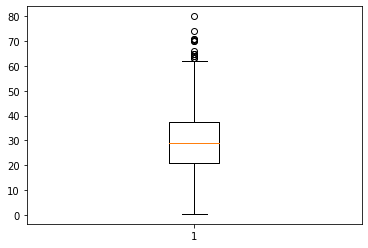

In [19]:
%matplotlib inline
plt.boxplot(titanic['Age'])

In [20]:
cnames= ['Age','Fare']

In [21]:
q75,q25 = np.percentile(titanic['Age'],[75,25])   #q75= 35 q25= 22
iqr= q75 - q25        # 13
minimum= q25 - (iqr*1.5)  #2.5
maximum= q75 + (iqr*1.5)  #54.5
q25

21.0

In [22]:
q751,q251 = np.percentile(test['Age'],[75,25])   #q75= 35.75 q25= 23
iqr1= q751 - q251        # 12.75
mini= q251 - (iqr1*1.5)  # 3.875
maxi= q751 + (iqr1*1.5)  # 54.875
maxi

61.0

In [23]:
miss= test['Age'].isnull().sum()
miss

0

In [24]:
titanic.loc[titanic['Age']< minimum,'Age']=np.nan
titanic.loc[titanic['Age']> maximum,'Age']=np.nan

test.loc[test['Age']< mini,'Age']=np.nan
test.loc[test['Age']> maxi,'Age']=np.nan

In [25]:
miss= test['Age'].isnull().sum()
miss

8

In [26]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,2.0
1,2,1,1,190,0,38.000000,1,0,596,71.2833,0.0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,2.0
3,4,1,1,272,0,35.000000,1,0,49,53.1000,2.0
4,5,0,3,15,1,35.000000,0,0,472,8.0500,2.0
5,6,0,3,554,1,15.811094,0,0,275,8.4583,1.0
6,7,0,1,515,1,54.000000,0,0,85,51.8625,2.0
7,8,0,3,624,1,2.000000,3,1,395,21.0750,2.0
8,9,1,3,412,0,27.000000,0,2,344,11.1333,2.0
9,10,1,2,576,0,14.000000,1,0,132,30.0708,0.0


In [27]:
titanic= pd.DataFrame(KNN(k=3).fit_transform(titanic),columns=titanic.columns)

Imputing row 1/891 with 0 missing, elapsed time: 0.567
Imputing row 101/891 with 0 missing, elapsed time: 0.568
Imputing row 201/891 with 0 missing, elapsed time: 0.569
Imputing row 301/891 with 0 missing, elapsed time: 0.570
Imputing row 401/891 with 0 missing, elapsed time: 0.570
Imputing row 501/891 with 0 missing, elapsed time: 0.571
Imputing row 601/891 with 0 missing, elapsed time: 0.572
Imputing row 701/891 with 0 missing, elapsed time: 0.573
Imputing row 801/891 with 0 missing, elapsed time: 0.573


In [28]:
test= pd.DataFrame(KNN(k=3).fit_transform(test),columns=test.columns)

Imputing row 1/418 with 0 missing, elapsed time: 0.059
Imputing row 101/418 with 0 missing, elapsed time: 0.061
Imputing row 201/418 with 0 missing, elapsed time: 0.062
Imputing row 301/418 with 0 missing, elapsed time: 0.063
Imputing row 401/418 with 0 missing, elapsed time: 0.064


In [29]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.000000,1.0,0.0,523.0,7.2500,2.0
1,2.0,1.0,1.0,190.0,0.0,38.000000,1.0,0.0,596.0,71.2833,0.0
2,3.0,1.0,3.0,353.0,0.0,26.000000,0.0,0.0,669.0,7.9250,2.0
3,4.0,1.0,1.0,272.0,0.0,35.000000,1.0,0.0,49.0,53.1000,2.0
4,5.0,0.0,3.0,15.0,1.0,35.000000,0.0,0.0,472.0,8.0500,2.0
5,6.0,0.0,3.0,554.0,1.0,15.811094,0.0,0.0,275.0,8.4583,1.0
6,7.0,0.0,1.0,515.0,1.0,54.000000,0.0,0.0,85.0,51.8625,2.0
7,8.0,0.0,3.0,624.0,1.0,2.000000,3.0,1.0,395.0,21.0750,2.0
8,9.0,1.0,3.0,412.0,0.0,27.000000,0.0,2.0,344.0,11.1333,2.0
9,10.0,1.0,2.0,576.0,0.0,14.000000,1.0,0.0,132.0,30.0708,0.0


In [30]:
miss= test['Age'].isnull().sum()
miss

0

In [31]:
q75_1,q25_1 = np.percentile(titanic['Fare'],[75,25])   #q75= 31  q25= 7.9104
iqr_1= q75_1 - q25_1        # 23.0896
minimum_1= q25_1 - (iqr_1*1.5)  # -26.724
maximum_1= q75_1 + (iqr_1*1.5)  # 65.6344
maximum_1

65.6344

In [32]:
q752,q252 = np.percentile(test['Fare'],[75,25])   #q75= 35.75 q25= 23
iqr2= q752 - q252        # 12.75
mini_1= q252 - (iqr2*1.5)  # -27.468
maxi_1= q752 + (iqr2*1.5)  # 66.835
iqr2

23.576075

In [33]:
miss= titanic['Fare'].isnull().sum()
miss

0

In [34]:
titanic.loc[titanic['Fare']< minimum_1,'Fare']=np.nan
titanic.loc[titanic['Fare']> maximum_1,'Fare']=np.nan

test.loc[test['Fare']< mini_1,'Fare']=np.nan
test.loc[test['Fare']> maxi_1,'Fare']=np.nan

In [35]:
miss= test['Fare'].isnull().sum()
miss

55

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.250,2.0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,NaN,0.0
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.925,2.0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.100,2.0
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.050,2.0


In [37]:
titanic= pd.DataFrame(KNN(k=3).fit_transform(titanic),columns=titanic.columns)

Imputing row 1/891 with 0 missing, elapsed time: 0.228
Imputing row 101/891 with 0 missing, elapsed time: 0.229
Imputing row 201/891 with 0 missing, elapsed time: 0.230
Imputing row 301/891 with 0 missing, elapsed time: 0.231
Imputing row 401/891 with 0 missing, elapsed time: 0.232
Imputing row 501/891 with 0 missing, elapsed time: 0.234
Imputing row 601/891 with 0 missing, elapsed time: 0.235
Imputing row 701/891 with 1 missing, elapsed time: 0.236
Imputing row 801/891 with 0 missing, elapsed time: 0.237


In [38]:
test= pd.DataFrame(KNN(k=3).fit_transform(test),columns=test.columns)

Imputing row 1/418 with 0 missing, elapsed time: 0.051
Imputing row 101/418 with 0 missing, elapsed time: 0.052
Imputing row 201/418 with 0 missing, elapsed time: 0.053
Imputing row 301/418 with 0 missing, elapsed time: 0.055
Imputing row 401/418 with 1 missing, elapsed time: 0.056


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892.0,3.0,206.0,1.0,34.500000,0.0,0.0,152.0,7.8292,1.0
1,893.0,3.0,403.0,0.0,47.000000,1.0,0.0,221.0,7.0000,2.0
2,894.0,2.0,269.0,1.0,32.353548,0.0,0.0,73.0,9.6875,1.0
3,895.0,3.0,408.0,1.0,27.000000,0.0,0.0,147.0,8.6625,2.0
4,896.0,3.0,178.0,0.0,22.000000,1.0,1.0,138.0,12.2875,2.0


In [40]:
miss= test['Fare'].isnull().sum()
miss

0

In [147]:
titanic= titanic.to_csv('newOA_train.csv')
test= test.to_csv('newOA_test.csv')

AttributeError: 'NoneType' object has no attribute 'to_csv'

# Feature Selection

In [41]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [42]:
titanic= pd.read_csv('OA_train.csv')
test= pd.read_csv('OA_test.csv')

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.250000,2.0
1,2,1,1,190,0,38.0,1,0,596,11.202189,0.0
2,3,1,3,353,0,26.0,0,0,669,7.925000,2.0
3,4,1,1,272,0,35.0,1,0,49,53.100000,2.0
4,5,0,3,15,1,35.0,0,0,472,8.050000,2.0


In [44]:
con_names=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare']
cat_names=['Pclass','Sex','Embarked']

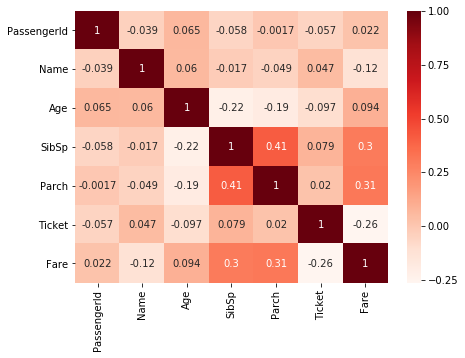

In [45]:
df_corr= titanic.loc[:,con_names]
df_chi = titanic.loc[:,cat_names]
## Correlation Analysis for continous variables
f,ax= plt.subplots(figsize=(7,5))
corr= df_corr.corr()
sns.heatmap(corr,annot=True, cmap=plt.cm.Reds)   #Ticket - Fare # Age - SibSp #Age - Parch

In [46]:
for i in cat_names:
    print(i)
    chi2, p ,dof, ex = chi2_contingency(pd.crosstab(titanic['Survived'],titanic[i]))
    print(p)
    # Nothing to remove as p value for all the categorical variable is less than 0.05

Pclass
4.549251711298793e-23
Sex
1.1973570627755645e-58
Embarked
5.711293529317806e-06


# Feature Scaling

In [47]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [48]:
titanic= pd.read_csv('OA_train.csv')

In [49]:
con_names=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare']

(array([  9.,  11.,  31.,  77., 153.,  42.,  34.,  25.,  25.,  11.]),
 array([ 5. ,  9.9, 14.8, 19.7, 24.6, 29.5, 34.4, 39.3, 44.2, 49.1, 54. ]),
 <a list of 10 Patch objects>)

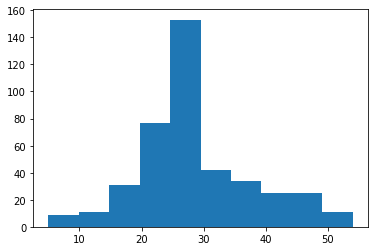

In [50]:
plt.hist(test['Age'])

In [51]:
for i in con_names:
    print(i)
    titanic[i]= (titanic[i]- min(titanic[i])) / (max(titanic[i]) - min(titanic[i]))

PassengerId
Name
Age
SibSp
Parch
Ticket
Fare


In [52]:
for i in con_names:
    print(i)
    test[i]=(test[i]-min(test[i])) / (max(test[i])-min(test[i]))

PassengerId
Name
Age
SibSp
Parch
Ticket
Fare


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,3,0.494005,1,0.602041,0.000,0.000000,0.419890,0.120449,1
1,0.002398,3,0.966427,0,0.857143,0.125,0.000000,0.610497,0.107692,2
2,0.004796,2,0.645084,1,0.558236,0.000,0.000000,0.201657,0.149038,1
3,0.007194,3,0.978417,1,0.448980,0.000,0.000000,0.406077,0.133269,2
4,0.009592,3,0.426859,0,0.346939,0.125,0.111111,0.381215,0.189038,2


In [157]:
titanic= titanic.to_csv('train_feature.csv',index=False)
test= test.to_csv('test_feature.csv',index=False)

# Sampling

In [54]:
import random
from sklearn.model_selection import train_test_split

In [55]:
titanic= pd.read_csv('feature.csv')
titanic.shape

(891, 11)

In [56]:
sim_sample= titanic.sample(200)  #Simple Sampling
sim_sample.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
88,0.098876,1,0.291011,0,0.366677,0.375,0.333333,0.139706,0.482373,2.0,1
110,0.123596,1,0.749438,1,0.756414,0.000,0.000000,0.002941,0.838991,2.0,0
700,0.786517,1,0.050562,0,0.285482,0.125,0.000000,0.897059,0.322856,0.0,1
269,0.302247,1,0.102247,0,0.561546,0.000,0.000000,0.901471,0.197651,2.0,1
268,0.301124,1,0.342697,0,0.935044,0.000,0.166667,0.864706,0.570143,2.0,1


In [57]:
k = round(len(titanic)/200)
k

4

In [58]:
y= random.randrange(0,8)
y

3

In [59]:
sys_sample= titanic.iloc[y::k,:]  #Systematic Sampling

In [60]:
sys_sample.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
3,0.003371,1,0.305618,0,0.561546,0.125,0.000000,0.072059,0.856739,2.0,1
7,0.007865,3,0.701124,1,0.025658,0.375,0.166667,0.580882,0.340033,2.0,0
11,0.012360,1,0.106742,0,0.935044,0.000,0.000000,0.055882,0.428370,2.0,1
15,0.016854,2,0.403371,0,0.886327,0.000,0.000000,0.225000,0.258151,2.0,1
19,0.021348,3,0.575281,0,0.225012,0.000,0.000000,0.270588,0.116571,0.0,1
23,0.025843,1,0.859551,1,0.447873,0.000,0.000000,0.061765,0.572773,2.0,1
27,0.030337,1,0.292135,1,0.301721,0.375,0.333333,0.139706,0.517619,2.0,0
31,0.034831,1,0.871910,0,0.286511,0.125,0.000000,0.861765,0.403667,0.0,1
35,0.039326,1,0.417978,1,0.675219,0.125,0.000000,0.063235,0.838991,2.0,0
39,0.043820,3,0.661798,0,0.220526,0.125,0.000000,0.273529,0.181379,0.0,1


In [61]:
m = titanic['Pclass']

In [62]:
Rest, Sample= train_test_split(titanic,test_size=0.70,stratify=m)

In [63]:
Rest.shape

(267, 11)

# Random Forest

In [2]:
titanic= pd.read_csv('feature.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,0
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,1
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,1
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,1
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,0


In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
titanic['Survived']= titanic['Survived'].replace(1,'Yes')

In [6]:
titanic=titanic.drop(['Name'],axis=1)

In [7]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,No
1,0.001124,1,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,Yes
2,0.002247,3,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,Yes
3,0.003371,1,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,Yes
4,0.004494,3,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,No


In [8]:
titanic= titanic.drop(['PassengerId'],axis=1)

In [9]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,No
1,1,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,Yes
2,3,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,Yes
3,1,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,Yes
4,3,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,No


In [32]:
X = titanic.values[:,0:8]
Y = titanic.values[:,8]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [33]:
RF_model= RandomForestClassifier(n_estimators = 100).fit(X_train,Y_train)

In [34]:
RF_Predictions= RF_model.predict(X_test)

In [35]:
acc= accuracy_score(Y_test,RF_Predictions)*100
acc

82.68156424581005

In [36]:
CM= pd.crosstab(Y_test,RF_Predictions)
CM

col_0,No,Yes
row_0,,
No,96,20
Yes,11,52


In [37]:
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]
FNR= (FN*100)/(FN+TP)
FNR

17.46031746031746

# Logistic Regression

In [72]:
titanic= pd.read_csv('feature.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,0
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,1
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,1
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,1
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,0


In [29]:
titanic['Survived']= titanic['Survived'].replace(,)
titanic['Survived']= titanic['Survived'].replace(1,'Yes')

In [30]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,No
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,Yes
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,Yes
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,Yes
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,No


In [73]:
cat_var= ['Pclass','Sex','Embarked']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,No
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,Yes
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,Yes
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,Yes
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,No


In [74]:
for i in cat_var:
    temp= pd.get_dummies(titanic[i],prefix=i)
    titanic=titanic.join(temp)

In [75]:
titanic.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_1.144399503,Embarked_1.9999999830000001,Embarked_2.0
0,0.000000,3,0.121348,1,0.350438,0.125,0.000000,0.769118,0.116975,2.0,...,0,0,1,0,1,0,0,0,0,1
1,0.001124,1,0.213483,0,0.610263,0.125,0.000000,0.876471,0.126552,0.0,...,1,0,0,1,0,1,0,0,0,0
2,0.002247,3,0.396629,0,0.415395,0.000,0.000000,0.983824,0.127865,2.0,...,0,0,1,1,0,0,0,0,0,1
3,0.003371,1,0.305618,0,0.561546,0.125,0.000000,0.072059,0.856739,2.0,...,1,0,0,1,0,0,0,0,0,1
4,0.004494,3,0.016854,1,0.561546,0.000,0.000000,0.694118,0.129882,2.0,...,0,0,1,0,1,0,0,0,0,1
5,0.005618,3,0.622472,1,0.249937,0.000,0.000000,0.404412,0.136470,1.0,...,0,0,1,0,1,0,1,0,0,0
6,0.006742,1,0.578652,1,0.870088,0.000,0.000000,0.125000,0.836773,2.0,...,1,0,0,0,1,0,0,0,0,1
7,0.007865,3,0.701124,1,0.025658,0.375,0.166667,0.580882,0.340033,2.0,...,0,0,1,0,1,0,0,0,0,1
8,0.008989,3,0.462921,0,0.431634,0.000,0.333333,0.505882,0.179630,2.0,...,0,0,1,1,0,0,0,0,0,1
9,0.010112,2,0.647191,0,0.220526,0.125,0.000000,0.194118,0.485176,0.0,...,0,1,0,1,0,1,0,0,0,0


In [76]:
os.chdir('C:/Users/Samruddhi/Desktop/titanic')

In [77]:
titanic= titanic.to_csv('try1.csv',index=False)

In [78]:
titanic= pd.read_csv('try1.csv')

In [79]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,0,0,1,0,1,0,0,1,0
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,1,0,0,1,0,1,0,0,1
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,0,0,1,1,0,0,0,1,1
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,1,0,0,1,0,0,0,1,1
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,0,0,1,0,1,0,0,1,0


In [80]:
sample_index=np.random.rand(len(titanic))< 0.8

In [81]:
train= titanic[sample_index]
test= titanic[~sample_index]

In [82]:
titanic.shape

(891, 19)

In [97]:
train_cols= train.columns[0:18]
train_cols

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_0', 'Sex_1', 'Embarked_0.0', 'Embarked_1.0', 'Embarked_2.0'],
      dtype='object')

In [99]:
import statsmodels.api as sm

In [100]:
logit=sm.Logit(train['Survived'],train[train_cols]).fit()

         Current function value: 0.444391
         Iterations: 35


C:\Users\Samruddhi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [101]:
logit.summary()

C:\Users\Samruddhi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Samruddhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  706
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                           13
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                  0.3327
Time:                        14:31:53   Log-Likelihood:                -313.74
converged:                      False   LL-Null:                       -470.14
Covariance Type:            nonrobust   LLR p-value:                 5.028e-59
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PassengerId      0.1948      0.353      0.553      0.581      -0.496       0.886
Pclass         -27.2059        nan        nan        nan         nan         nan
Name            -0.1748      0.352     -0.497      0.619      -0.864       0.515
Sex            -14.1938   1.77e+07  -8.02e-07      1.000   -3.47e+07    3.47e+07
Age             -2.0576      0.551     -3.736      0.000      -3.137      -0.978
SibSp           -2.6146      1.038     -2.518      0.012      -4.650      -0.579
Parch           -1.1769      0.831     -1.416      0.157      -2.806       0.452
Ticket          -0.3602      0.348     -1.035      0.301      -1.042       0.322
Fare             1.2468      0.636      1.961      0.050       0.001       2.493
Embarked       109.2827   5.48e+04      0.002      0.998   -1.07e+05    1.07e+05
Pclass_1       -39.6243   3.61e+06   -1.1e-05      1.000   -7.08e+06    7.08e+06
Pclass_2       -13.2467   4.25e+06  -3.11e-06      1.000   -8.34e+06    8.34e+06
Pclass_3        12.9707        nan        nan        nan         nan         nan
Sex_0          -25.7066        nan        nan        nan         nan         nan
Sex_1          -14.1938   7.38e+06  -1.92e-06      1.000   -1.45e+07    1.45e+07
Embarked_0.0    96.0657   8.23e+06   1.17e-05      1.000   -1.61e+07    1.61e+07
Embarked_1.0   -13.1005   8.23e+06  -1.59e-06      1.000   -1.61e+07    1.61e+07
Embarked_2.0  -122.8656   8.23e+06  -1.49e-05      1.000   -1.61e+07    1.61e+07
================================================================================
"""

In [102]:
test['Actual_prob']= logit.predict(test[train_cols])

C:\Users\Samruddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Survived,Actual_prob
1,0.001124,1,0.213483,0,0.610263,0.125,0.000000,0.876471,0.126552,0.0,1,0,0,1,0,1,0,0,1,0.852123
2,0.002247,3,0.396629,0,0.415395,0.000,0.000000,0.983824,0.127865,2.0,0,0,1,1,0,0,0,1,1,0.556671
7,0.007865,3,0.701124,1,0.025658,0.375,0.166667,0.580882,0.340033,2.0,0,0,1,0,1,0,0,1,0,0.077955
13,0.014607,3,0.031461,1,0.626502,0.125,0.833333,0.489706,0.504605,2.0,0,0,1,0,1,0,0,1,0,0.029850
15,0.016854,2,0.403371,0,0.886327,0.000,0.000000,0.225000,0.258151,2.0,0,1,0,1,0,0,0,1,1,0.664762
16,0.017978,3,0.766292,1,0.025658,0.500,0.166667,0.705882,0.469916,1.0,0,0,1,0,1,0,1,0,0,0.099089
17,0.019101,2,0.974157,1,0.362685,0.000,0.000000,0.222059,0.209748,2.0,0,1,0,0,1,0,0,1,1,0.253966
21,0.023596,2,0.089888,1,0.545307,0.000,0.000000,0.223529,0.209748,2.0,0,1,0,0,1,0,0,1,1,0.214434
24,0.026966,3,0.703371,0,0.123092,0.375,0.166667,0.580882,0.340033,2.0,0,0,1,1,0,0,0,1,0,0.503338
25,0.028090,3,0.049438,0,0.610263,0.125,0.833333,0.483824,0.506420,2.0,0,0,1,1,0,0,0,1,1,0.317990


In [105]:
test['ActualVal']=1
test.loc[test.Actual_prob < 0.5,'ActualVal'] = 0

C:\Users\Samruddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Samruddhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [106]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Survived,Actual_prob,ActualVal
1,0.001124,1,0.213483,0,0.610263,0.125,0.000000,0.876471,0.126552,0.0,...,0,0,1,0,1,0,0,1,0.852123,1
2,0.002247,3,0.396629,0,0.415395,0.000,0.000000,0.983824,0.127865,2.0,...,0,1,1,0,0,0,1,1,0.556671,1
7,0.007865,3,0.701124,1,0.025658,0.375,0.166667,0.580882,0.340033,2.0,...,0,1,0,1,0,0,1,0,0.077955,0
13,0.014607,3,0.031461,1,0.626502,0.125,0.833333,0.489706,0.504605,2.0,...,0,1,0,1,0,0,1,0,0.029850,0
15,0.016854,2,0.403371,0,0.886327,0.000,0.000000,0.225000,0.258151,2.0,...,1,0,1,0,0,0,1,1,0.664762,1


In [107]:
CM= pd.crosstab(test['Survived'],test['ActualVal'])

In [108]:
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]

In [109]:
accuracy= ((TP+TN)*100)/(TP+TN+FN+FP)
accuracy

80.0

In [110]:
FR=(FN*100)/(FN+TP)
FR

25.35211267605634

# Test Data Pre-Processing

# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import pandas as pd
import numpy as np

In [65]:
train= pd.read_csv('train_feature.csv')
test= pd.read_csv('test_feature.csv')

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,3,0.494005,1,0.602041,0.000,0.000000,0.419890,0.120449,1
1,0.002398,3,0.966427,0,0.857143,0.125,0.000000,0.610497,0.107692,2
2,0.004796,2,0.645084,1,0.558236,0.000,0.000000,0.201657,0.149038,1
3,0.007194,3,0.978417,1,0.448980,0.000,0.000000,0.406077,0.133269,2
4,0.009592,3,0.426859,0,0.346939,0.125,0.111111,0.381215,0.189038,2


In [68]:
train=train.drop(['Name'],axis=1)
train=train.drop(['PassengerId'],axis=1)

test=test.drop(['Name'],axis=1)
test=test.drop(['PassengerId'],axis=1)

In [69]:
train['Survived']= train['Survived'].replace(1,'Yes')
train['Survived']= train['Survived'].replace(0,'No')

In [70]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,1,0.350438,0.125,0.0,0.769118,0.111538,2.0,No
1,1,0,0.610263,0.125,0.0,0.876471,0.172341,0.0,Yes
2,3,0,0.415395,0.000,0.0,0.983824,0.121923,2.0,Yes
3,1,0,0.561546,0.125,0.0,0.072059,0.816923,2.0,Yes
4,3,1,0.561546,0.000,0.0,0.694118,0.123846,2.0,No


In [71]:
X = train.values[:,0:8]
Y = train.values[:,8]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [72]:
train.shape

(891, 9)

In [102]:
KNN_model= KNeighborsClassifier(n_neighbors=9).fit(X_train,Y_train)

In [103]:
KNN_Predictions= KNN_model.predict(X_test)

In [104]:
acc= accuracy_score(Y_test,KNN_Predictions)*100
acc

76.53631284916202

In [76]:
CM= pd.crosstab(Y_test,KNN_Predictions)
CM

col_0,No,Yes
row_0,,
No,82,25
Yes,21,51


In [77]:
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]
FNR= (FN*100)/(FN+TP)
FNR

29.166666666666668

In [78]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [79]:
lr=KNeighborsClassifier(n_neighbors=7)
scores= cross_val_score(lr,X,Y,cv=10)
acc2= scores.mean()
scores
acc2          #Mean of accuracy is close to the Accuracy we obtain in the train model

0.8114683350357508

In [80]:
KNN_model= KNeighborsClassifier(n_neighbors=7).fit(X,Y)

In [81]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,0.602041,0.000,0.000000,0.419890,0.120449,1
1,3,0,0.857143,0.125,0.000000,0.610497,0.107692,2
2,2,1,0.558236,0.000,0.000000,0.201657,0.149038,1
3,3,1,0.448980,0.000,0.000000,0.406077,0.133269,2
4,3,0,0.346939,0.125,0.111111,0.381215,0.189038,2


In [82]:
final_predictions= KNN_model.predict(test.values[:,0:8])

In [83]:
test_final= pd.read_csv('test.csv')

In [32]:
test_ids= test_final['PassengerId']
submission_df={'PassengerId':test_ids,
               'Survived':final_predictions}
submit= pd.DataFrame(submission_df)

In [33]:
submit.to_csv('titanic.csv',index=False)

In [34]:
titanic= pd.read_csv('titanic.csv')

In [35]:
titanic['Survived']= titanic['Survived'].replace('Yes',1)
titanic['Survived']= titanic['Survived'].replace('No',0)

In [36]:
titanic.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [38]:
new_titanic= titanic.to_csv('shravasty.csv',index=False)

# Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
NB_model= GaussianNB().fit(X_train,Y_train)

In [169]:
NB_Predictions= NB_model.predict(X_test)

In [170]:
acc= accuracy_score(Y_test,NB_Predictions)*100
acc

78.77094972067039

In [173]:
CM= pd.crosstab(Y_test,NB_Predictions)
CM

col_0,No,Yes
row_0,,
No,86,24
Yes,14,55


In [174]:
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]
FNR= (FN*100)/(FN+TP)
FNR

20.28985507246377

# SVM simple

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [40]:
titanic= pd.read_csv('feature.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.000000,3,0.121348,1,0.350438,0.125,0.0,0.769118,0.116975,2.0,0
1,0.001124,1,0.213483,0,0.610263,0.125,0.0,0.876471,0.126552,0.0,1
2,0.002247,3,0.396629,0,0.415395,0.000,0.0,0.983824,0.127865,2.0,1
3,0.003371,1,0.305618,0,0.561546,0.125,0.0,0.072059,0.856739,2.0,1
4,0.004494,3,0.016854,1,0.561546,0.000,0.0,0.694118,0.129882,2.0,0


In [41]:
#titanic=titanic.drop(['Name'],axis=1)
#titanic= titanic.drop(['PassengerId'],axis=1)

In [36]:
X = titanic.values[:,0:10]
Y = titanic.values[:,10]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [22]:
svm_model= SVC(kernel='linear').fit(X_train, Y_train)

In [23]:
svm_predictions = svm_model.predict(X_test)

In [24]:
confusion_matrix(Y_test,svm_predictions)

array([[100,  16],
       [ 22,  41]], dtype=int64)

In [25]:
acc= accuracy_score(Y_test,svm_predictions)*100
acc

78.77094972067039

# SVM Polynomial Kernel

In [42]:
svm_model1 = SVC(kernel='poly').fit(X_train, Y_train)

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
svm_predictions = svm_model1.predict(X_test)

In [44]:
acc= accuracy_score(Y_test,svm_predictions)*100
acc

74.86033519553072

# SVM Gaussian Kernel

In [45]:
svm_model2 = SVC(kernel='rbf').fit(X_train, Y_train)

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
svm_predictions = svm_model2.predict(X_test)

In [47]:
acc= accuracy_score(Y_test,svm_predictions)*100
acc

73.74301675977654

# SVM Sigmoid Kernel

In [48]:
svm_model3 = SVC(kernel='sigmoid').fit(X_train, Y_train)

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
svm_predictions = svm_model3.predict(X_test)

In [50]:
acc= accuracy_score(Y_test,svm_predictions)*100
acc

43.575418994413404